# 多项式回归与欠拟合、过拟合

### 构造一批样本集

In [17]:
def myfun(x):
    '''目标函数
    input:x(float):自变量
    output:函数值'''
    return 10 + 5 * x + 4 * x**2 + 6 * x**3

In [18]:
import numpy as np
x = np.linspace(-3,3, 7)
x

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

In [19]:
x_p = (np.linspace(-2.5, 2.5, 6)).reshape(-1,1) # 预测点

In [20]:
import random
y = myfun(x) + np.random.random(size=len(x)) * 100 - 50
y = np.array([-136.49570384,   -8.98763646,  -23.33764477,   50.97656894,
         20.19888523,   35.76052266,  199.48378741])
y

array([-136.49570384,   -8.98763646,  -23.33764477,   50.97656894,
         20.19888523,   35.76052266,  199.48378741])

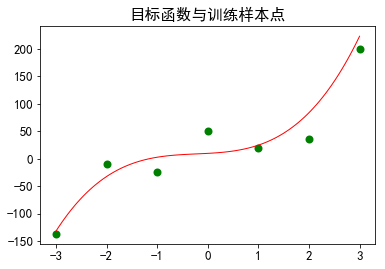

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=13)
plt.title(u'目标函数与训练样本点')
plt.scatter(x, y, color="green", linewidth=2)
x1 = np.linspace(-3, 3, 100)
y0 = myfun(x1)
plt.plot(x1, y0, color="red", linewidth=1)
plt.show()

### 线性回归模型

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# 创建并拟合模型
model = LinearRegression()
model.fit(x, y)
print('--线性回归模型--')
print('训练集预测值与样本的残差均方值：' + str(np.mean((model.predict(x)-y)**2)))
print('测试集预测值与目标函数值的残差均方值：' + str(np.mean((model.predict(x_p)-myfun(x_p))**2)))
print('系数：' + str(model.coef_))
print('截距：' + str(model.intercept_))

--线性回归模型--
训练集预测值与样本的残差均方值：2019.644967464967
测试集预测值与目标函数值的残差均方值：578.9941757019192
系数：[[40.74897579]]
截距：[19.65696845]


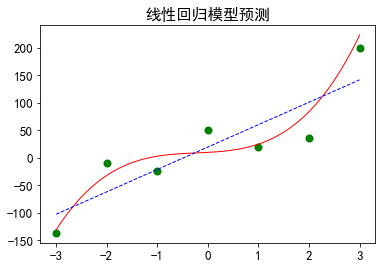

In [23]:
plt.title(u'线性回归模型预测')
plt.scatter(x, y, color="green", linewidth=2)
x1 = x1.reshape(-1,1)
plt.plot(x1, y0, color="red", linewidth=1)
y1 = model.predict(x1)
plt.plot(x1, y1, "b--", linewidth=1)
plt.show()

### 三次多项式模型

In [24]:
from sklearn.preprocessing import PolynomialFeatures
featurizer_3 = PolynomialFeatures(degree=3)
x_3 = featurizer_3.fit_transform(x)
x_3

array([[  1.,  -3.,   9., -27.],
       [  1.,  -2.,   4.,  -8.],
       [  1.,  -1.,   1.,  -1.],
       [  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.]])

In [25]:
x_p_3 = featurizer_3.transform(x_p)
x_p_3

array([[  1.   ,  -2.5  ,   6.25 , -15.625],
       [  1.   ,  -1.5  ,   2.25 ,  -3.375],
       [  1.   ,  -0.5  ,   0.25 ,  -0.125],
       [  1.   ,   0.5  ,   0.25 ,   0.125],
       [  1.   ,   1.5  ,   2.25 ,   3.375],
       [  1.   ,   2.5  ,   6.25 ,  15.625]])

In [26]:
model_3 = LinearRegression()
model_3.fit(x_3, y)
print('--三次多项式模型--')
print('训练集预测值与样本的残差均方值：' + str(np.mean((model_3.predict(x_3)-y)**2)))
print('测试集预测值与目标函数值的残差均方值：' + str(np.mean((model_3.predict(x_p_3)-myfun(x_p))**2)))
print('系数：' + str(model_3.coef_))
print('截距：' + str(model_3.intercept_))

--三次多项式模型--
训练集预测值与样本的残差均方值：534.1920527025624
测试集预测值与目标函数值的残差均方值：247.2068857064365
系数：[[ 0.         -7.41390241  1.43393358  6.88041117]]
截距：[13.92123413]


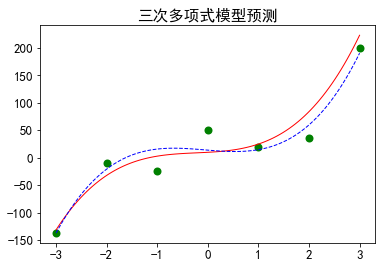

In [27]:
plt.title(u'三次多项式模型预测')
plt.scatter(x, y, color="green", linewidth=2)
plt.plot(x1, y0, color="red", linewidth=1)
#y1 = model.predict(x1)
#plt.plot(x1, y1, color="black", linewidth=1)
y3 = model_3.predict(featurizer_3.fit_transform(x1))
plt.plot(x1, y3, "b--", linewidth=1)
plt.show()

### 五次多项式模型

--五次多项式模型--
训练集预测值与样本的残差均方值：209.5711220656676
测试集预测值与目标函数值的残差均方值：1232.6319883426306
系数：[[  0.          31.53983182  -9.59767085 -11.33268976   1.15255569
    1.56112294]]
截距：[25.77609263]


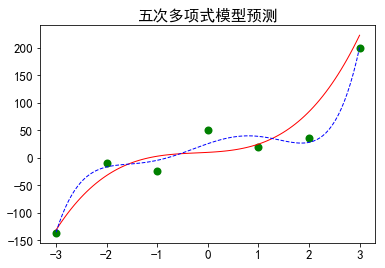

In [28]:
from sklearn.preprocessing import PolynomialFeatures
featurizer_5 = PolynomialFeatures(degree=5)
x_5 = featurizer_5.fit_transform(x)
x_p_5 = featurizer_5.transform(x_p)
model_5 = LinearRegression()
model_5.fit(x_5, y)
print('--五次多项式模型--')
print('训练集预测值与样本的残差均方值：' + str(np.mean((model_5.predict(x_5)-y)**2)))
print('测试集预测值与目标函数值的残差均方值：' + str(np.mean((model_5.predict(x_p_5)-myfun(x_p))**2)))
print('系数：' + str(model_5.coef_))
print('截距：' + str(model_5.intercept_))

plt.title(u'五次多项式模型预测')
plt.scatter(x, y, color="green", linewidth=2)
plt.plot(x1, y0, color="red", linewidth=1)
#y1 = model.predict(x1)
#plt.plot(x1, y1, color="black", linewidth=1)
#y3 = model_3.predict(featurizer_3.fit_transform(x1))
#plt.plot(x1, y3, "b--", linewidth=1)
y5 = model_5.predict(featurizer_5.fit_transform(x1))
plt.plot(x1, y5, "b--", linewidth=1)
plt.show()

### 九次多项式模型

--九次多项式模型--
训练集预测值与样本的残差均方值：1.0660452153768193e-23
测试集预测值与目标函数值的残差均方值：38492.13592017863
系数：[[-1.55270241e-12  9.86092386e+00 -3.85815674e+01  8.93592424e+00
  -2.49195458e+01  5.70545419e+00  1.19222564e+01 -2.99067031e+00
  -9.67091926e-01  2.56633014e-01]]
截距：[50.97656894]


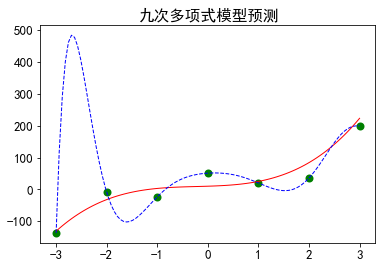

In [29]:
from sklearn.preprocessing import PolynomialFeatures
featurizer_9 = PolynomialFeatures(degree=9)
x_9 = featurizer_9.fit_transform(x)
x_p_9 = featurizer_9.transform(x_p)
model_9 = LinearRegression()
model_9.fit(x_9, y)
print('--九次多项式模型--')
print('训练集预测值与样本的残差均方值：' + str(np.mean((model_9.predict(x_9)-y)**2)))
print('测试集预测值与目标函数值的残差均方值：' + str(np.mean((model_9.predict(x_p_9)-myfun(x_p))**2)))
print('系数：' + str(model_9.coef_))
print('截距：' + str(model_9.intercept_))

plt.title(u'九次多项式模型预测')
plt.scatter(x, y, color="green", linewidth=2)
plt.plot(x1, y0, color="red", linewidth=1)
#y1 = model.predict(x1)
#plt.plot(x1, y1, color="black", linewidth=1)
#y3 = model_3.predict(featurizer_3.fit_transform(x1))
#plt.plot(x1, y3, "b--", linewidth=1)
y9 = model_9.predict(featurizer_9.fit_transform(x1))
plt.plot(x1, y9, "b--", linewidth=1)
plt.show()